Bazham Khanatayev \
Data 512 HW 1 \
Visualization Notebook

The intructions for the type of figure we need to produce in this notebook: 

Maximum Average and Minimum Average - The first graph should contain time series for the articles that have the highest average monthly page requests and the lowest average monthly page requests for desktop access and mobile access. Your graph should have four lines (max desktop, min desktop, max mobile, min mobile).

Top 10 Peak Page Views - The second graph should contain time series for the top 10 article pages by largest (peak) page views over the entire time by access type. You first find the month for each article that contains the highest (peak) page views, and then order the articles by these peak values. Your graph should contain the top 10 for desktop and top 10 for mobile access (20 lines).


Fewest Months of Data - The third graph should show pages that have the fewest months of available data. These will all be relatively short time series and should contain a set of the most recent academy award winners. Your graph should show the 10 articles with the fewest months of data for desktop access and the 10 articles with the fewest months of data for mobile access

The high level summary for this notebook is that we are taking the JSON files that we created and then turning them into dataframes. After that, we use those dataframes to get the points that we need for the average min's and max's of the relelvant articles per month. Then finally, we plot this information.

## Imports and Reading the JSON files that we created in part 1.

In [1]:
import pandas as pd
import json

In [2]:
# For the mobile data
with open('academy_monthly_mobile_20150701-20230930.json', 'r') as file:
    mobile_data = json.load(file)

# For the desktop data
with open('academy_monthly_desktop_20150701-20230930.json', 'r') as file:
    desktop_data = json.load(file)


The following code takes our Mobile and Desktop JSON files and loads them into a dataframe. I believe that it is easier to work with data when it is in a tabular form.

In [3]:
# Create list to append into
mobile_df_list = []

In [4]:
# Convert mobile data to dataframe

# Iterate over each movie and its associated details in the mobile_data dictionary
for movie, details in mobile_data.items():
    # Create a temporary DataFrame (temp_df) from the 'items' list in the details of the current movie
    temp_df = pd.DataFrame(details['items'])
    
    # Add a new column to the temp_df named 'movie', and set its value to the current movie's name
    # This ensures that each row in the temp_df has an associated movie name
    temp_df['movie'] = movie  # Adding movie name as a column
    
    # Append the temp_df to a list (mobile_df_list) that collects DataFrames for all movies
    mobile_df_list.append(temp_df)
    

# After processing all movies, concatenate all DataFrames in the mobile_df_list into a single DataFrame (mobile_df)
# The ignore_index=True parameter is used to reset the row indices of the consolidated DataFrame
mobile_df = pd.concat(mobile_df_list, ignore_index=True)

The code for converting the desktop data is very similar and the above comments will still make sense.

In [5]:
# Convert desktop data to dataframe
desktop_df_list = []

for movie, details in desktop_data.items():
    if details and 'items' in details:  # Checking if details is not None and contains 'items'
        temp_df = pd.DataFrame(details['items'])
        temp_df['movie'] = movie  # Adding movie name as a column
        desktop_df_list.append(temp_df)

desktop_df = pd.concat(desktop_df_list, ignore_index=True)


The following code converts the timestamp information from the JSON into a more standard format that can be used for plotting and data aggregation.

In [6]:
# Convert the 'timestamp' string into a datetime-friendly format
def format_timestamp(ts_str):
    # Extract year, month, day from the string
    year = ts_str[:4]
    month = ts_str[4:6]
    day = ts_str[6:8]
    return f"{year}-{month}-{day}"

# Apply the format_timestamp function and then convert to datetime
mobile_df['timestamp'] = pd.to_datetime(mobile_df['timestamp'].apply(format_timestamp))
desktop_df['timestamp'] = pd.to_datetime(desktop_df['timestamp'].apply(format_timestamp))

# Define date range
start_date = '2015-07-01'
end_date = '2023-09-30'

# Filter mobile dataframe for desired date range
filtered_mobile_df = mobile_df[(mobile_df['timestamp'] >= start_date) & 
                               (mobile_df['timestamp'] <= end_date)]

# Filter desktop dataframe for desired date range
filtered_desktop_df = desktop_df[(desktop_df['timestamp'] >= start_date) & 
                                 (desktop_df['timestamp'] <= end_date)]



Note: Some of the more verbose parts of the plotting were written with the assistance of two LLM's: Google Bard and GPT 4.

## Maximum Average and Minimum Average

There are two plots below because the wording of the problem did not make the x axis clear. What are we averaging over exactly. I have produced a plot showing the min and max per month and a plot showing the average monthly highs and lows.

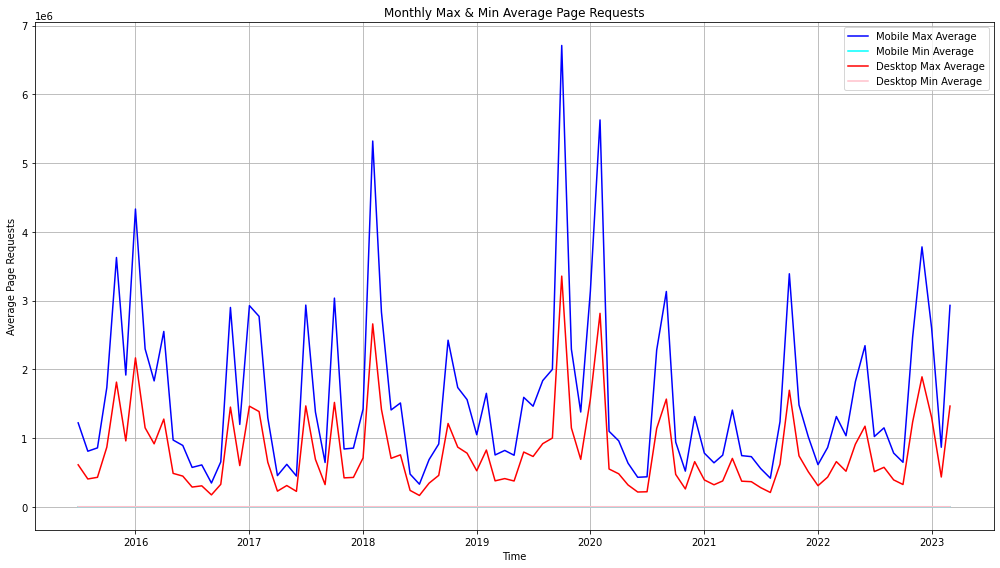

In [9]:
import matplotlib.pyplot as plt

# Group by timestamp and article, then compute average views for each month for mobile
mobile_monthly_avg = mobile_df.groupby(['timestamp', 'article'])['views'].mean()

# Get the articles with max and min average views for each month for mobile
mobile_max_avg = mobile_monthly_avg.groupby('timestamp').max()
mobile_min_avg = mobile_monthly_avg.groupby('timestamp').min()

# Group by timestamp and article, then compute average views for each month for desktop
desktop_monthly_avg = desktop_df.groupby(['timestamp', 'article'])['views'].mean()

# Get the articles with max and min average views for each month for desktop
desktop_max_avg = desktop_monthly_avg.groupby('timestamp').max()
desktop_min_avg = desktop_monthly_avg.groupby('timestamp').min()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(mobile_max_avg, label='Mobile Max Average', color='blue')
plt.plot(mobile_min_avg, label='Mobile Min Average', color='cyan')
plt.plot(desktop_max_avg, label='Desktop Max Average', color='red')
plt.plot(desktop_min_avg, label='Desktop Min Average', color='pink')
plt.title('Monthly Max & Min Average Page Requests')
plt.xlabel('Time')
plt.ylabel('Average Page Requests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


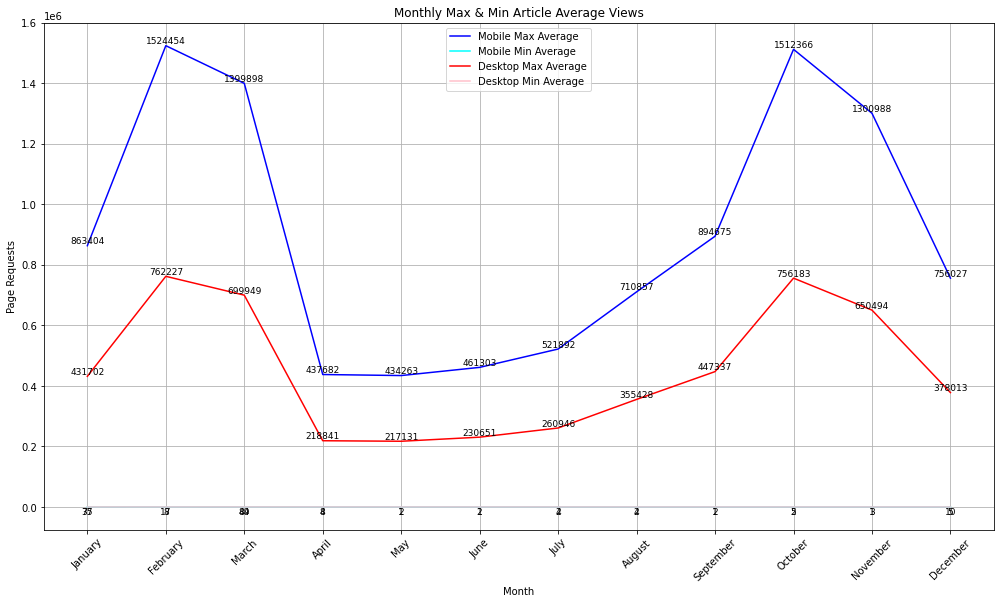

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the month from the 'timestamp' column
mobile_df['month'] = pd.to_datetime(mobile_df['timestamp']).dt.month
desktop_df['month'] = pd.to_datetime(desktop_df['timestamp']).dt.month

# Group by month and article, then compute the mean views
mobile_monthly_avg = mobile_df.groupby(['month', 'article'])['views'].mean().reset_index()
desktop_monthly_avg = desktop_df.groupby(['month', 'article'])['views'].mean().reset_index()

# Identify the articles with the max and min average views for each month
mobile_max_avg = mobile_monthly_avg.groupby('month')['views'].idxmax()
mobile_min_avg = mobile_monthly_avg.groupby('month')['views'].idxmin()

desktop_max_avg = desktop_monthly_avg.groupby('month')['views'].idxmax()
desktop_min_avg = desktop_monthly_avg.groupby('month')['views'].idxmin()

# Extract the average views for these articles
mobile_max_values = mobile_monthly_avg.loc[mobile_max_avg, 'views'].values
mobile_min_values = mobile_monthly_avg.loc[mobile_min_avg, 'views'].values

desktop_max_values = desktop_monthly_avg.loc[desktop_max_avg, 'views'].values
desktop_min_values = desktop_monthly_avg.loc[desktop_min_avg, 'views'].values

# Plotting
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(14, 8))

plt.plot(months, mobile_max_values, label='Mobile Max Average', color='blue')
plt.plot(months, mobile_min_values, label='Mobile Min Average', color='cyan')
plt.plot(months, desktop_max_values, label='Desktop Max Average', color='red')
plt.plot(months, desktop_min_values, label='Desktop Min Average', color='pink')

# Annotate values for Mobile Max
for i, txt in enumerate(mobile_max_values):
    plt.annotate(f"{int(txt)}", (months[i], mobile_max_values[i]), fontsize=9, ha='center', va='bottom')

# Annotate values for Mobile Min
for i, txt in enumerate(mobile_min_values):
    plt.annotate(f"{int(txt)}", (months[i], mobile_min_values[i]), fontsize=9, ha='center', va='top')

# Annotate values for Desktop Max
for i, txt in enumerate(desktop_max_values):
    plt.annotate(f"{int(txt)}", (months[i], desktop_max_values[i]), fontsize=9, ha='center', va='bottom')

# Annotate values for Desktop Min
for i, txt in enumerate(desktop_min_values):
    plt.annotate(f"{int(txt)}", (months[i], desktop_min_values[i]), fontsize=9, ha='center', va='top')



plt.title('Monthly Max & Min Article Average Views')
plt.xlabel('Month')
plt.ylabel('Page Requests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # To rotate month names for better readability
plt.show()


## Top 10 Peak Page Views 

The following code is straight forward. It follows the instructions: the graph should contain time series for the top 10 article pages by largest (peak) page views over the entire time by access type. You first find the month for each article that contains the highest (peak) page views, and then order the articles by these peak values. Your graph should contain the top 10 for desktop and top 10 for mobile access (20 lines).


In [15]:
# Find the month with peak views for each movie article in mobile and desktop
mobile_peak = mobile_df.groupby('movie')['views'].max().reset_index()
desktop_peak = desktop_df.groupby('movie')['views'].max().reset_index()

# Sort and pick the top 10 movies for mobile and desktop
top_10_mobile_movies = mobile_peak.nlargest(10, 'views')['movie'].tolist()
top_10_desktop_movies = desktop_peak.nlargest(10, 'views')['movie'].tolist()

# Now, filter the dataframes to keep only the time series for these top 10 movies
mobile_top_10_df = mobile_df[mobile_df['movie'].isin(top_10_mobile_movies)]
desktop_top_10_df = desktop_df[desktop_df['movie'].isin(top_10_desktop_movies)]

The graph below is a very large and detailed image. The user can zoom in and out as they need.

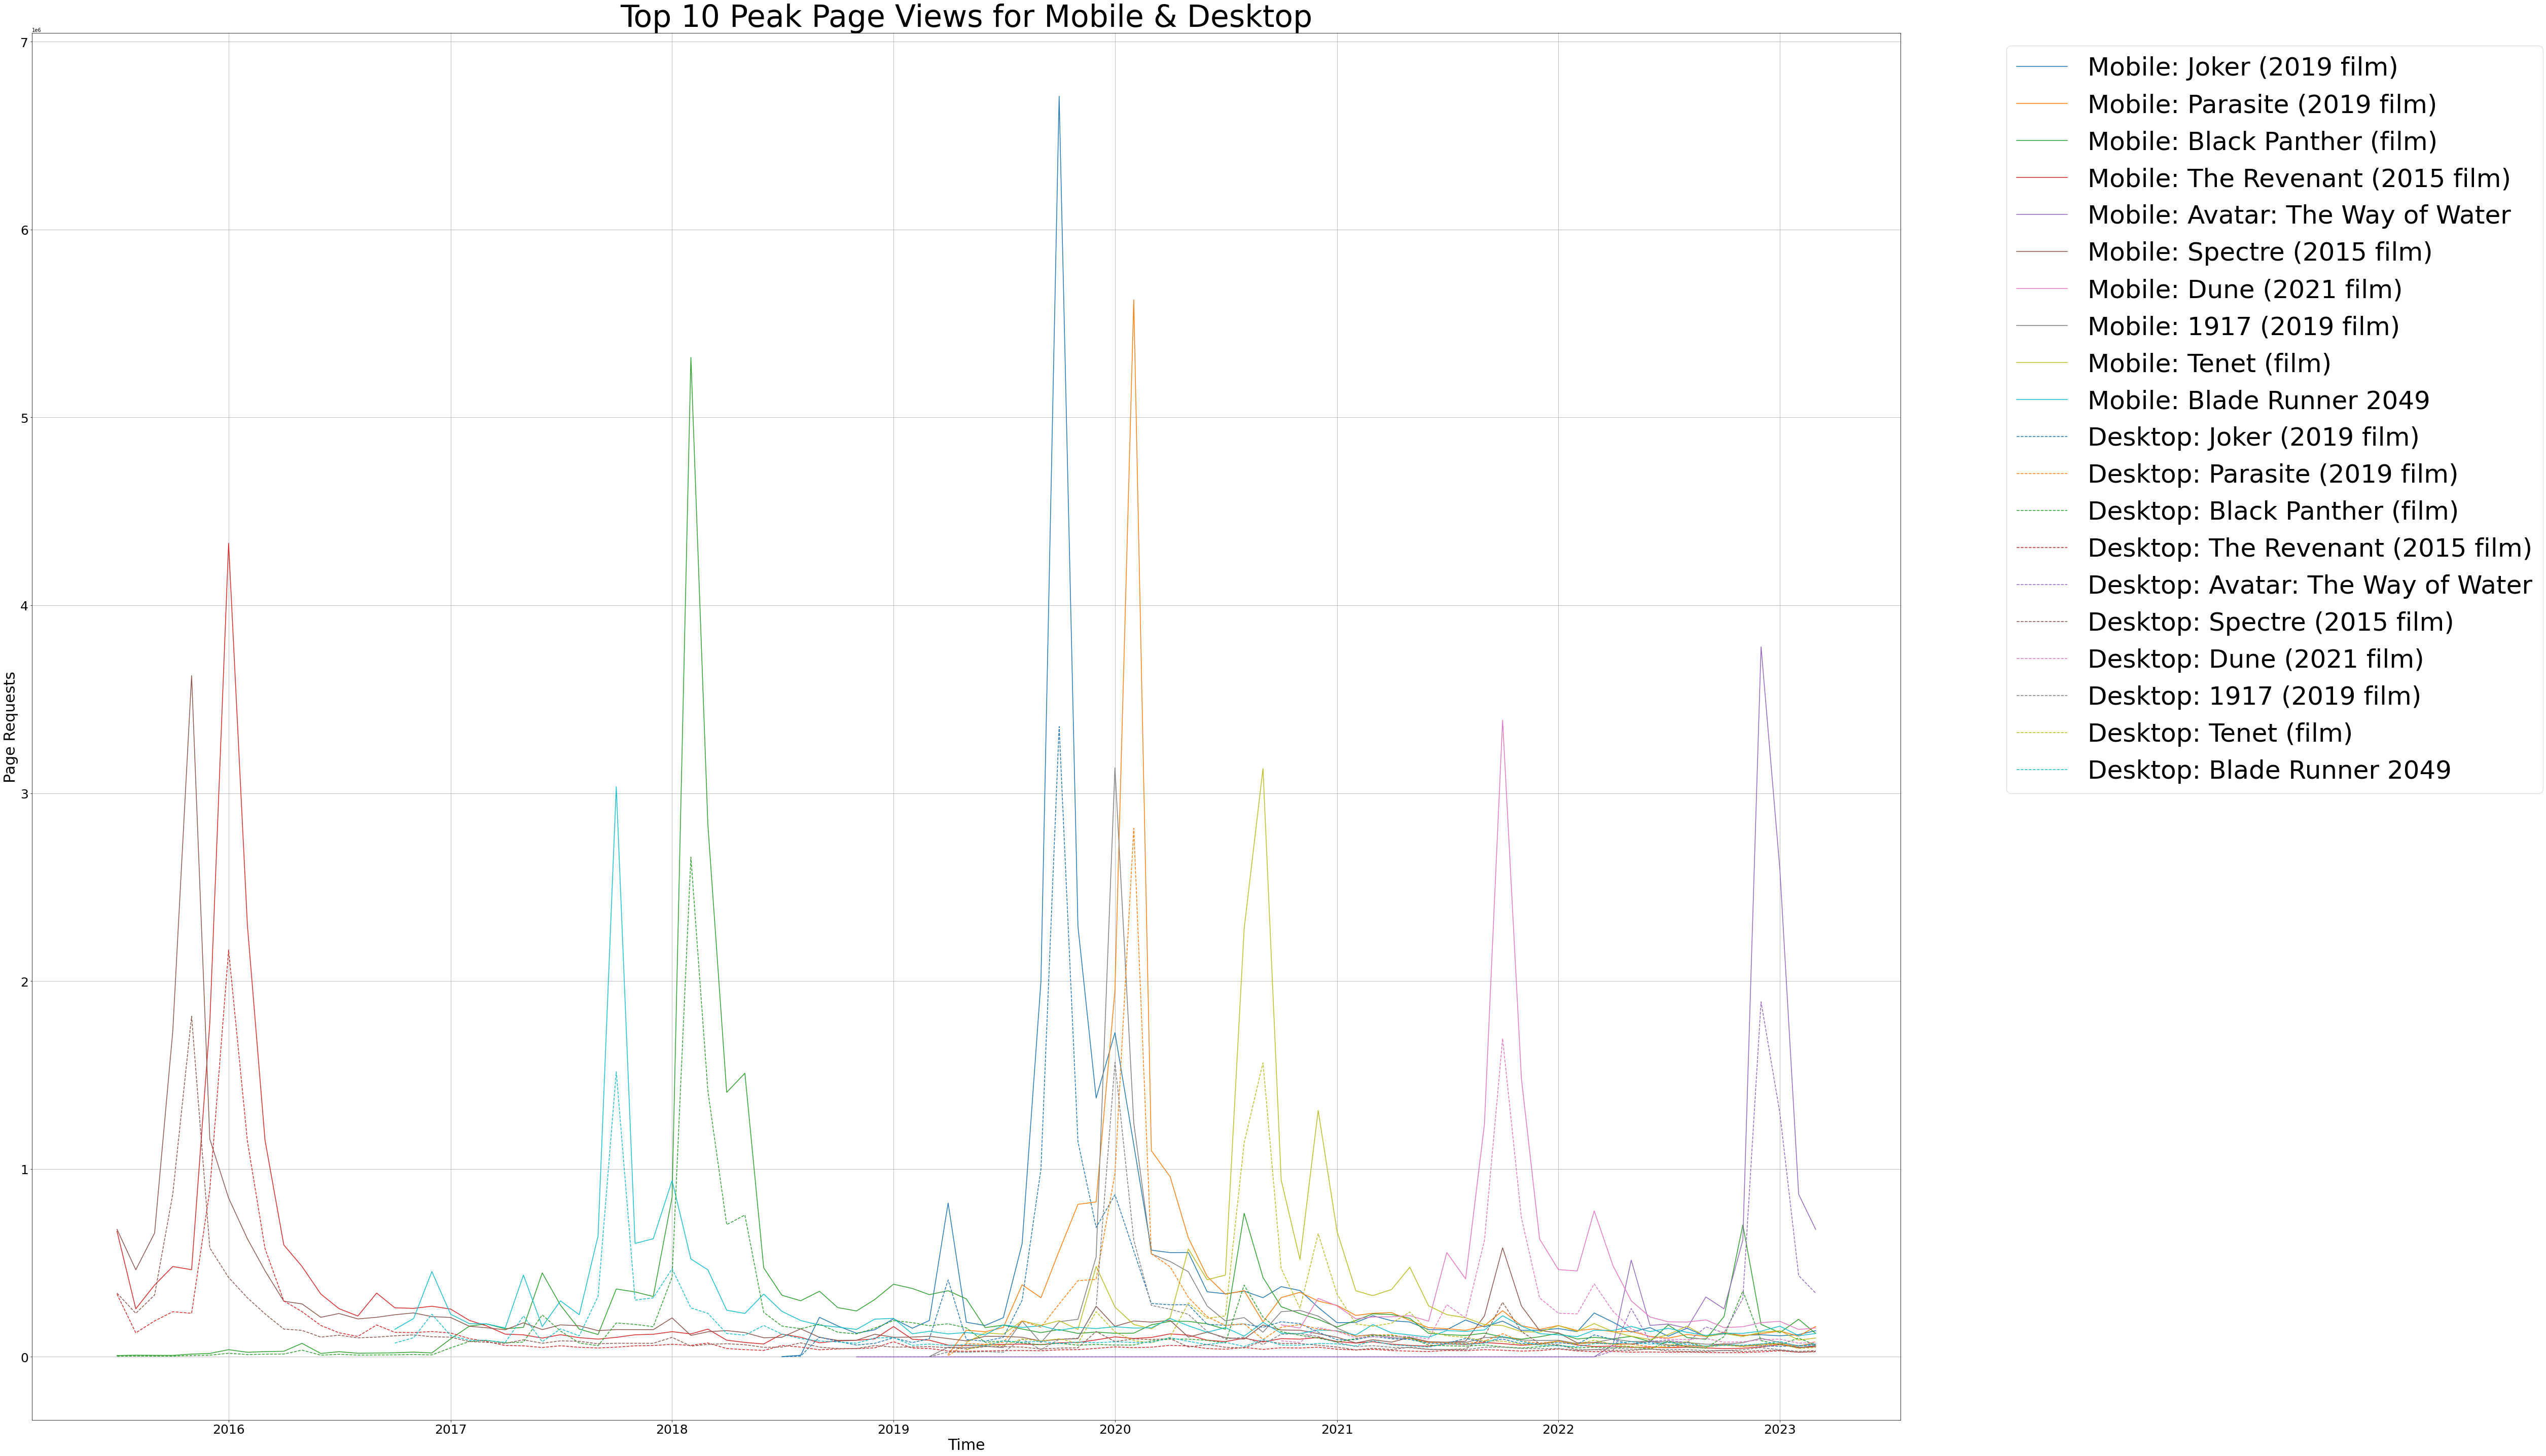

In [16]:
plt.figure(figsize=(70, 40)) 

# Plot for mobile
for movie in top_10_mobile_movies:
    subset = mobile_top_10_df[mobile_top_10_df['movie'] == movie]
    plt.plot(subset['timestamp'], subset['views'], label=f"Mobile: {movie}")

# Plot for desktop
for movie in top_10_desktop_movies:
    subset = desktop_top_10_df[desktop_top_10_df['movie'] == movie]
    plt.plot(subset['timestamp'], subset['views'], label=f"Desktop: {movie}", linestyle='--')

plt.title('Top 10 Peak Page Views for Mobile & Desktop', fontsize=60)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Page Requests', fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=50)
plt.grid(True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()

## Fewest Months of Data

The following code creates a plot of the 10 articles with the fewest months of data for desktop access and the 10 articles with the fewest months of data for mobile access.

In [17]:
# Calculate the number of months of data for each movie
mobile_months_count = mobile_df.groupby('movie').size()
desktop_months_count = desktop_df.groupby('movie').size()

# Get the top 10 movies with the fewest months of data
top_10_fewest_mobile = mobile_months_count.nsmallest(10).index.tolist()
top_10_fewest_desktop = desktop_months_count.nsmallest(10).index.tolist()

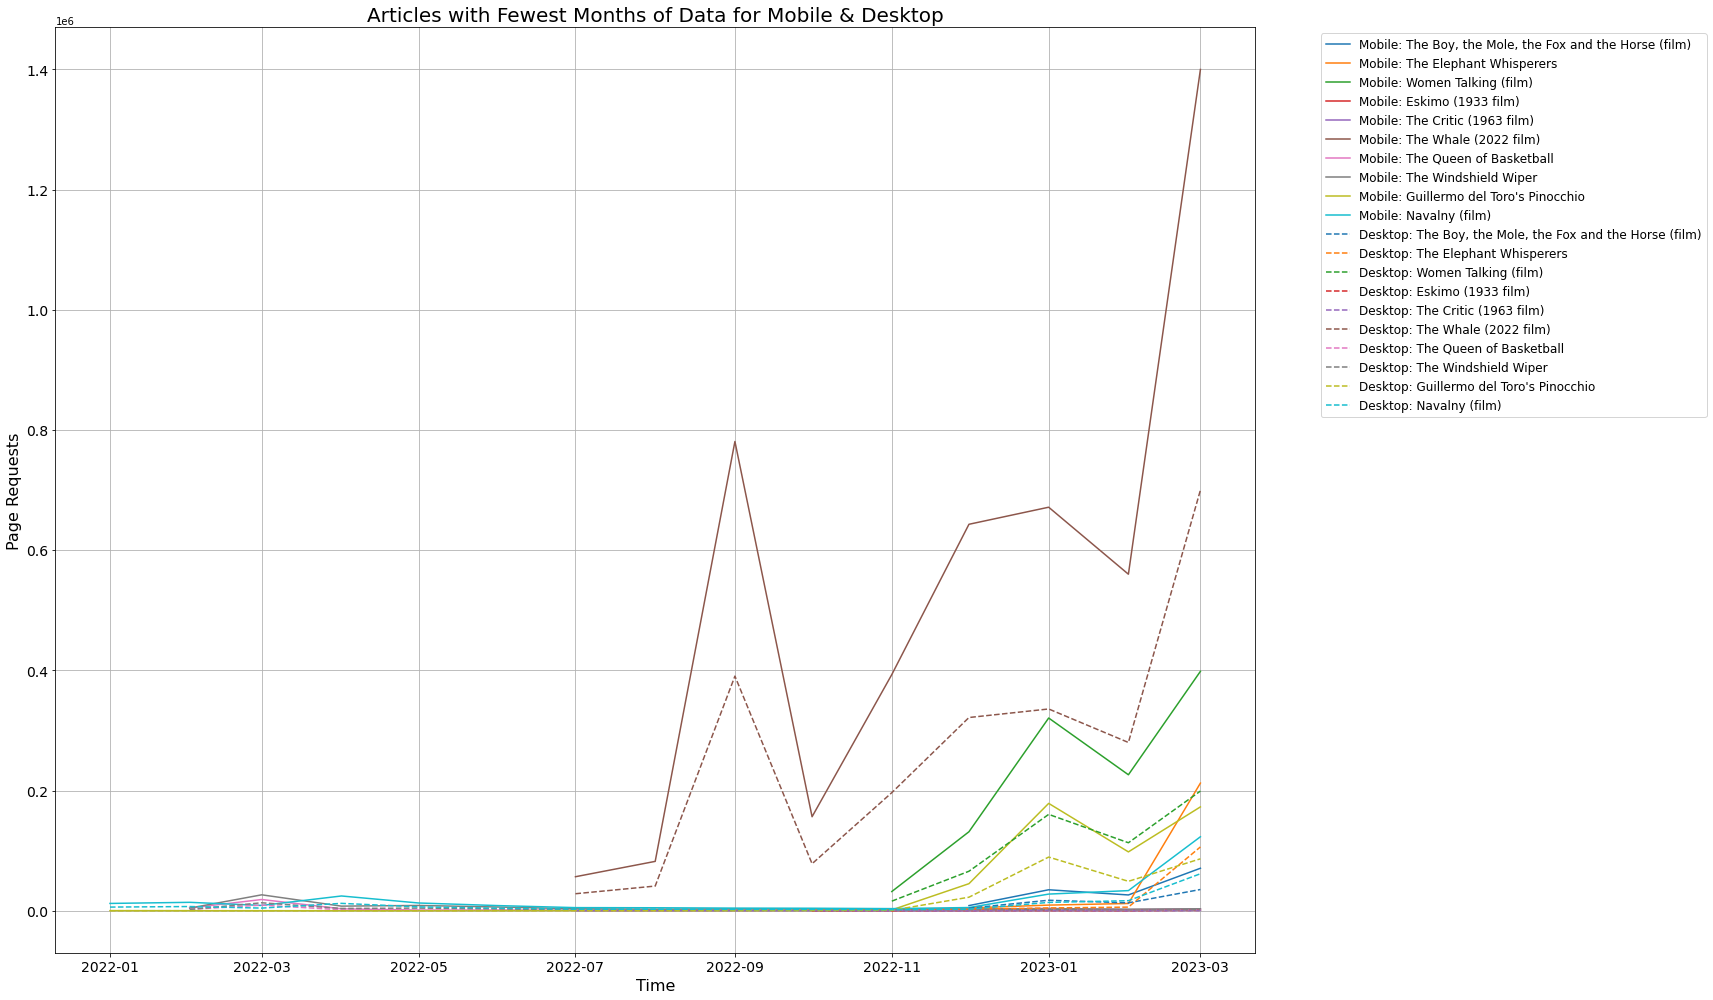

In [18]:
plt.figure(figsize=(24, 14))

# Plot for mobile
for movie in top_10_fewest_mobile:
    subset = mobile_df[mobile_df['movie'] == movie]
    plt.plot(subset['timestamp'], subset['views'], label=f"Mobile: {movie}")

# Plot for desktop
for movie in top_10_fewest_desktop:
    subset = desktop_df[desktop_df['movie'] == movie]
    plt.plot(subset['timestamp'], subset['views'], label=f"Desktop: {movie}", linestyle='--')

plt.title('Articles with Fewest Months of Data for Mobile & Desktop', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Page Requests', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()
